In [1]:
import sys
sys.path.append('..')
from Constants import Constants

import heartpy as hp
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

chizuru
chizuru さんの flow フェーズのデータを分析します。
計測時間は320.862秒です

Finished in 0.129938 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack

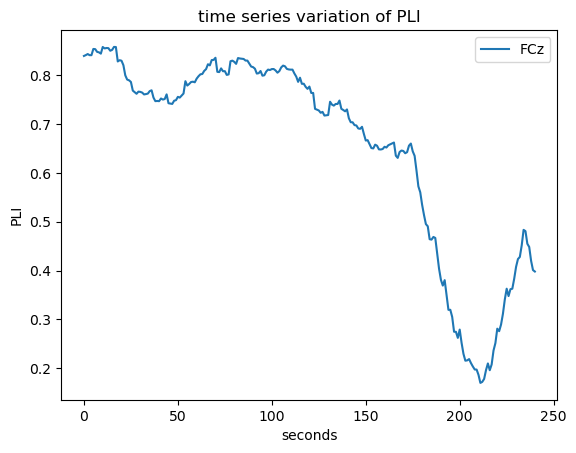

In [10]:
for i, subject_name in enumerate(Constants.subject_name_list):

    if subject_name != "chizuru":
        continue
    print(subject_name)
    
    for j, phase_name in enumerate(Constants.phase_name_list):

        # -----------------------------------------

        if phase_name != "flow":
            continue

        # practiceフェーズが使われなくなった弊害
        phase_index = j
        if phase_name != "rest":
            phase_index += 1


        pli_path = f"/Users/miyakooti/repositories/arai_MATLAB_program/csv/{i}_{subject_name}/PLIdata/PLI_{phase_index}_{subject_name}_{phase_name}.csv"
        pli_df = pd.read_csv(f"{pli_path}")

        pli_df = pli_df[["FCz"]]

        pli_df.plot()
        plt.title("time series variation of PLI")
        plt.xlabel("seconds")
        plt.ylabel("PLI")
        plt.legend()

        # -----------------------------------------

        
        hrdata = hp.get_data(f"{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/ECG_{subject_name}_{phase_name}.csv", delim = ",", column_name = "ECG")
        save_path = f'{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/{subject_name}_HRV.csv'
        
        # 心電図が逆向きになってしまっていたので、特例措置
        if subject_name == "kim":
            hrdata = hrdata*(-1)
        
        # debug-print -----------------------------------------------------------------
        
        print(f"{subject_name} さんの {phase_name} フェーズのデータを分析します。")
        sec = len(hrdata)/500
        print(f"計測時間は{sec}秒です")
        
        # / ---------------------------------------------------------------------------
        
        # 心拍変動パラメータの計算
        working_data, measures = hp.process(hrdata[int(60*Constants.fs):], Constants.fs, report_time=True, calc_freq=True)


        current_time = 120 * 500
        min_lf = 999999
        min_hf = 999999
        slice_value_s = 10


        while current_time < len(hrdata):

            hrdata_slice = hrdata[0: current_time]
            working_data, measures = hp.process(hrdata_slice, Constants.fs, report_time=False, calc_freq=True)
            
            min_lf = min(min_lf, measures["lf"])
            min_hf = min(min_hf, measures["hf"])

        
            current_time += slice_value_s * 500


